In [63]:
# imports de pacotes build-in
from pathlib import Path

# import de outras bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importanto os dados
df = pd.read_csv('../data/raw/insurance.csv')

# Visualizar cabeçalho do Data frame
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:

#visualizar tabela de frequencia da variável 'sex'
print(df['sex'].value_counts().reset_index(name='Frequência Absoluta'))

#podemos aprimorar a visualização com alguns ajustes de formatação:
fr=df['sex'].value_counts().reset_index(name='Frequência Absoluta')
fr.columns.name = 'Sexo'
fr.index.name= None


#Criar DataFrame
tabela_fr = pd.DataFrame({'Frequência Absoluta': df['sex'].value_counts(),'Frequência Relativa (%)': df['sex'].value_counts(normalize=True).round(4)* 100})
#print(tabela_fr)

#Em vez de gerar os gráficos, podemos ser mais rápidos gerando somente os dados em tela sem a tabela
print(df['sex'].value_counts())
print(df['sex'].value_counts(normalize=True))
print(df['children'].value_counts()) #imprime a relação total de nº de filhas em relação ao número de dados
print((df['children'].value_counts(normalize=True))) #imprime a relação total de nº de filhas em relação ao percentual de dados
    ## o comando acima imprimirá uma tabela que mostra que 42,89% da população não possui dependentes. Além disso, mostra que não há amostra que possua mais de 5 filhos.
# Gerando para a variável "age" com base na fórmula de Sturges, a seguir:
print(f'Total de dados na coluna age:{df['age'].count()}')
print(f'Valor minimo da coluna age:{df['age'].min()}')
print(f'Valor maximo da coluna age: {df['age'].max()}')
    #Considerando a Fórmula de Sturges para 1338 dados e, arredondando o valor de K (11,39) para
        # o inteiro mais próximo, temos que o total de classes recomendado é igual à 11.
        # omo "64 - 18 = 46" e "46/11 = 4,18", vamos optar por considerar dez classes de tamanho 05
        # para evitar números não inteiros nas extremidades das classes.
        #    |
        #    |
        #    V
#organizar dados
classes=pd.cut(df['age'],bins=[(18+5*k) for k in range(11)],right=False,include_lowest=True)

f_abs=classes.value_counts(sort=False)
f_rel=classes.value_counts(normalize=True, sort=False).round(4)*100

# Gerar tabela
tabela_fr=pd.DataFrame({"Frequência Absoluta": f_abs, "Frequência Relativa(%)": f_rel})

tabela_fr.index.name=None
tabela_fr.columns.name="Idade"

# Printando
#print(tabela_fr) # parei n página13

## exercício autoral: fazer um estudo sobre o bmi da tabela e relacionar com a referência média. Plotar gráficos para cada gênero.




## alguns dados sobre bmi
print(f'O bmi mínimo em df é: {df['bmi'].min()}')
print(f'O bmi máximo em df é: {df['bmi'].max()}') #Assustador! Talvez discrepante! ache o index 

#print(f'index do bmi:53.13 é {df['bmi'].index(int, 53)}')  #é uma list.index(elmnt, start, end)  
i=df[df['bmi']>53].index[0]
print(f'Índice do primeiro BMI > 53 é: {i}')
#print(f'index do bmi:53.13 é {df[df['bmi']>53].index}')

# frequência?
# análise masculina de frequência em intevalos definidos
super_magro=0
normal=0
sobrepeso=0
obeso=0
muito_obeso=0
for _, row in df.iterrows():       #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html . Se vc olhar a documentação desse método, ele retorna duas coisas, o índice da linha e o conteúdo dela Mas, no seu caso, vc não tá usando o índice pra nada, só o row Daí a IA sugeriu vc colocar uma "variável morta", que seria esse _ Daí a IA sugeriu vc colocar uma "variável morta", que seria esse "_" . Como o método retorna duas coisas mas vc só precisa de uma delas, vc pode fazer isso. uando vc vai pegar o retorno de uma função ou método, se essa coisa retornar algo que vc n precise atribuir a uma variável no seu código, vc pode fazer isso _ = func(bla_bla_bla)  
    bmi=row['bmi']
    if bmi<18.5:
        super_magro += 1
    elif 18.5<= bmi <24.9:
        normal += 1
    elif 24.9 <= bmi < 29.9:
        sobrepeso += 1
    elif 29.9<= bmi <39.9:
        obeso += 1
    else:
        muito_obeso += 1


# alternativamente, poderia fazer da seguinte forma:
# Definindo os intervalos e os rótulos
#bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
#labels = ['super_magro', 'normal', 'sobrepeso', 'obeso', 'muito_obeso']

# Criando uma nova coluna com as categorias
#df['categoria_bmi'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Contando a frequência de cada categoria
#frequencia = df['categoria_bmi'].value_counts().sort_index()
#print(frequencia)
# fim do código alternativo

# Impressão dos resultados
print('os dados são os seguintes')
print(f'super magros:{super_magro}, normal:{normal}, sobrepeso:{sobrepeso}, obeso:{obeso} e muito obeso:{muito_obeso}')
print(f'lenght df: {len(df)}')




      sex  Frequência Absoluta
0    male                  676
1  female                  662
sex
male      676
female    662
Name: count, dtype: int64
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64
Total de dados na coluna age:1338
Valor minimo da coluna age:18
Valor maximo da coluna age: 64
O bmi mínimo em df é: 15.96
O bmi máximo em df é: 53.13
Índice do primeiro BMI > 53 é: 1317
os dados são os seguintes
super magros:20, normal:222, sobrepeso:377, obeso:625 e muito obeso:94
lenght df: 1338


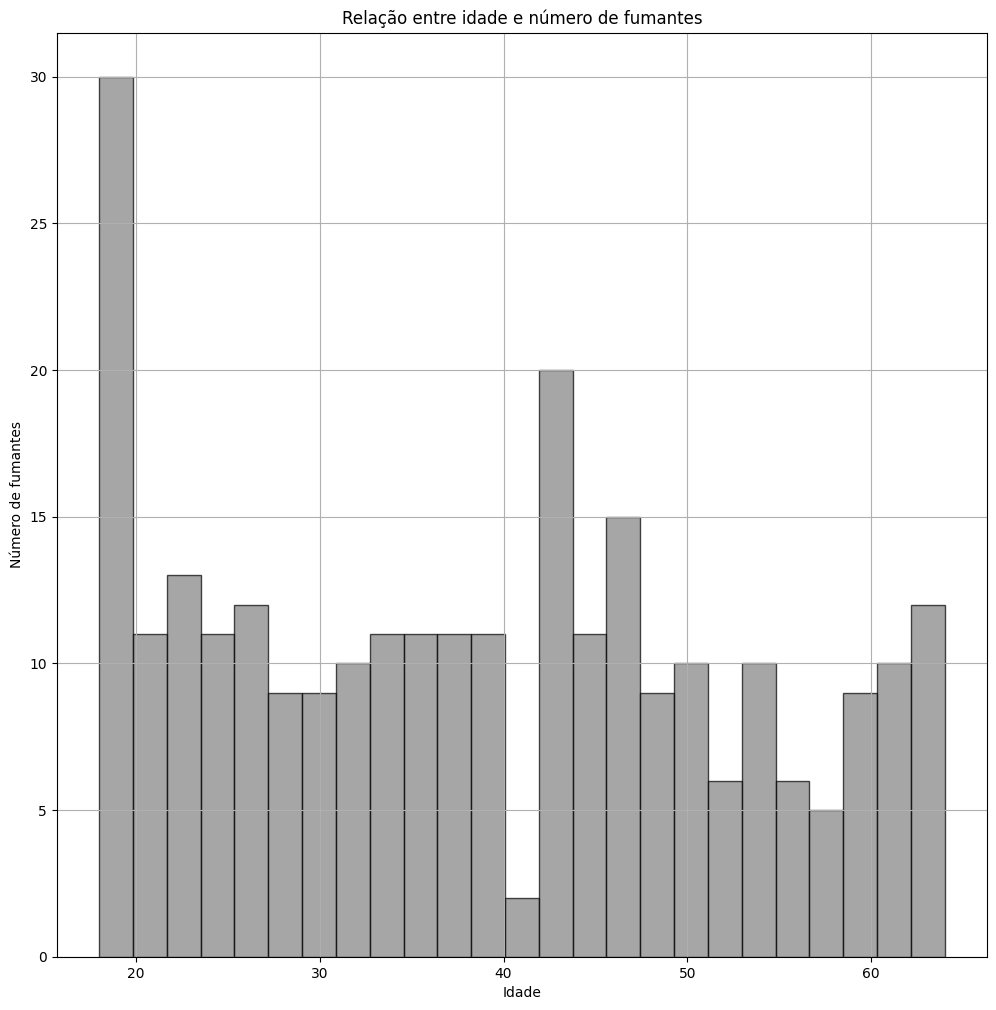

In [65]:
# Análise de qual região possui o maior número de fumantes
df.head()

# Qual a faixa etária com maior número de fumantes (age x smoker)?
#axf = plt.plot(df['age'],df['smoker'],'k-o')
plt.figure(figsize=(12, 12))
plt.xlim=(0,70)
plt.ylim=(0,50)
fumantes=df[df['smoker']=='yes']   #gera um novo dataframe somente com os fumantes 'true'
axf = plt.hist(fumantes['age'], bins=25, color='gray',  edgecolor='black', alpha=0.7)
plt.title('Relação entre idade e número de fumantes')
plt.xlabel('Idade')
plt.ylabel('Número de fumantes')
plt.grid()
plt.plot
plt.savefig('../data/figure/age_x_smoker.png')
plt.show()

/home/tiago-ubunto/Documentos/Estudo/ti_estudo/meus-projetos/insurance-eua-population/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7168: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


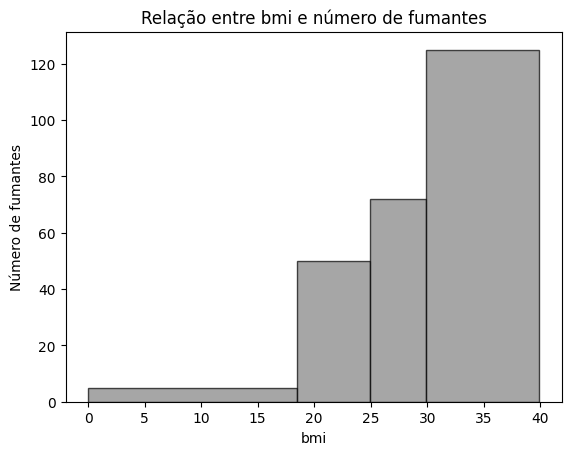

In [66]:
# Existe relação do bmi com o número de fumantes?
bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
labels = ['super_magro', 'normal', 'sobrepeso', 'obeso', 'muito_obeso']
bmi_fumantes=df[df['smoker']=='yes']
plt.hist(bmi_fumantes['bmi'], bins=bins, color='gray', edgecolor='black', alpha=0.7)
plt.title('Relação entre bmi e número de fumantes')
plt.xlabel('bmi')
plt.ylabel('Número de fumantes')
plt.show()


[]

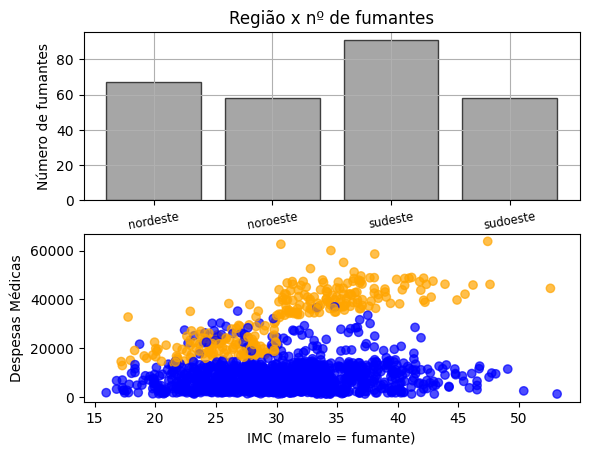

In [ ]:
# Gerar 4 gráficos num só objetos
fig3 = plt.figure()
# Qual a relação número de fumantes por região?
ax1=fig3.add_subplot(2,1,1) 
##Agrupando e gerando coluna de boleanos pra facilitar
df['smoker_bol']=df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
fumantes_por_regiao=df.groupby('region').agg({'smoker_bol':'sum'})
##Plotando o gráfico de ax1
plt.xlim=(0,70)
plt.ylim=(0,50)
plt.bar(fumantes_por_regiao.index, fumantes_por_regiao['smoker_bol'], color='gray',  edgecolor='black', alpha=0.7)
plt.title('Região x nº de fumantes')
plt.xlabel('Região')
plt.ylabel('Número de fumantes')
labels = ['nordeste', 'noroeste', 'sudeste', 'sudoeste']
ax1.set_xticks(ticks=range(len(labels)), labels=labels, rotation=10, fontsize='small')
ax1.grid()
ax1.plot

# Qual a relação do número de filhos com nº de fumantes?
ax2=fig3.add_subplot(2,1,2)
plt.scatter(x=df['bmi'], y=df['charges'], c=df['smoker'].map({'yes': 'orange', 'no': 'blue'}), alpha=0.7)
#plt.title('Fumante(ama)xIMCxDesp.Médicas')
plt.title(' ')
#plt.xlim=(0,50)
#plt.ylim=(0,70000)
plt.xlabel('IMC (Amarelo = fumante)')
plt.ylabel('Despesas Médicas')
xlabels2 = ['20', '30', '40', '50']
#ylabels2 = ['0','20k','40k','60k']
#ax2.set_yticks(ticks=ylabels2, labels=[])
ax2.plot()



# Qual a relação do bmi com o número de fumantes por gênero e faixa etária?
#ax3=fig3.add_subplot(2,2,3)
# Qual a relação do bmi com o número de fumantes por região, gênero e número de filhos?
#ax4=fig3.add_subplot(2,2,4)



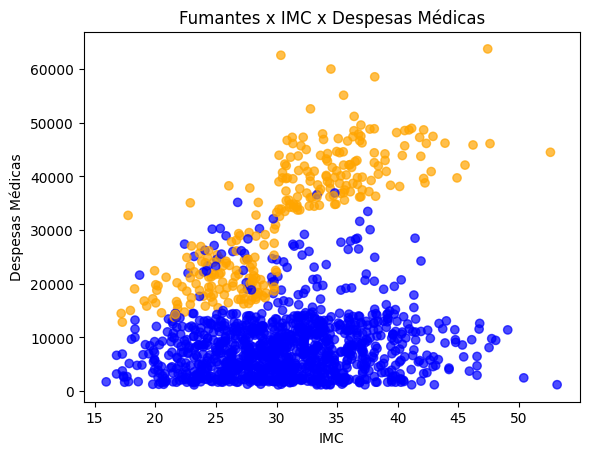

In [ ]:
# IMC vs Despesas Médicas vs Fumantes
#colors = df['smoker'].map({True: 'orange', False: 'blue'}) #não estava funcionando
#plt.scatter(x='bmi', y='charges', c=colors, alpha=0.7)     #não estava funcionando


#ax2.set_title('Relação entre número de filhos e número de fumantes')
#ax2.set_xlabel('Número de filhos')
#ax2.set_ylabel('Número de fumantes')
#ax2.grid()
#ax2.plot

# Despesas Médicas por Sexo:

# Mapa de Calor (Heatmap)

In [ ]:
# IMC vs Despesas Médicas vs Fumantes
plt.scatter(x=df['bmi'], y=df['charges'], c=df['smoker'].map({'yes': 'orange'}), alpha=0.5)
plt.scatter(x=df['bmi'], y=df['charges'], c=df['smoker_bol'].map(lambda x: 'blue' if x==0), alpha=0.5)
plt.title('Fumantes x IMC x Despesas Médicas')
plt.xlim=(0,50)
plt.ylim=(0,70000)
plt.xlabel('IMC')
plt.ylabel('Despesas Médicas')
plt.show()

SyntaxError: expected 'else' after 'if' expression (2215771035.py, line 3)

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_bol
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
